In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
raw_train = pd.read_csv('train.csv')
raw_test = pd.read_csv('test.csv')

In [3]:
df_train = raw_train.copy()
df_test  = raw_test.copy()
for_EDA = raw_train.copy()

**_Exploratory Data Analysis_**

In [4]:
for_EDA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364 entries, 0 to 363
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  364 non-null    int64 
 1   age                 364 non-null    int64 
 2   gender              364 non-null    object
 3   polyuria            364 non-null    object
 4   polydipsia          364 non-null    object
 5   sudden_weight_loss  364 non-null    object
 6   weakness            364 non-null    object
 7   polyphagia          364 non-null    object
 8   genital_thrush      364 non-null    object
 9   visual_blurring     364 non-null    object
 10  itching             364 non-null    object
 11  irritability        364 non-null    object
 12  delayed_healing     364 non-null    object
 13  partial_paresis     364 non-null    object
 14  muscle_stiffness    364 non-null    object
 15  alopecia            364 non-null    object
 16  obesity             364 no

In [5]:
mapping = {"Yes":1,"No":0,"Positive":1,"Negative":0,"Male":0,"Female":1}

In [6]:
EDA = for_EDA.drop(columns='class')
EDA = pd.get_dummies(EDA,dtype=float)
X_test = pd.get_dummies(df_test,dtype=float)
EDA = EDA.drop(columns='ID')
X_test = X_test.drop(columns='ID')

In [7]:
EDA.head()

,age,gender_Female,gender_Male,polyuria_No,polyuria_Yes,polydipsia_No,polydipsia_Yes,sudden_weight_loss_No,sudden_weight_loss_Yes,weakness_No,...,delayed_healing_No,delayed_healing_Yes,partial_paresis_No,partial_paresis_Yes,muscle_stiffness_No,muscle_stiffness_Yes,alopecia_No,alopecia_Yes,obesity_No,obesity_Yes
0,41,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,45,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,60,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
3,66,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
4,67,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0


In [8]:
X_test.head()

,age,gender_Female,gender_Male,polyuria_No,polyuria_Yes,polydipsia_No,polydipsia_Yes,sudden_weight_loss_No,sudden_weight_loss_Yes,weakness_No,...,delayed_healing_No,delayed_healing_Yes,partial_paresis_No,partial_paresis_Yes,muscle_stiffness_No,muscle_stiffness_Yes,alopecia_No,alopecia_Yes,obesity_No,obesity_Yes
0,57,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
1,55,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
2,30,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,45,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
4,47,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0


In [9]:
def features_engineering(df):
    df['UP'] = df['polyuria']*df['polydipsia']
    df['DP']  = df['polydipsia']*df['polyphagia']
    df['PD'] = df['polyphagia']*df['polydipsia']
    df['UDP'] = df['polyuria']*df['polydipsia']*df['polyphagia']
    return df

    

In [10]:
#EDA = features_engineering(EDA)
#X_test_p = features_engineering(X_test)

In [11]:
#EDA.corrwith(EDA['class']).sort_values(ascending=False).to_frame()

In [12]:
import seaborn as sns

<Axes: >

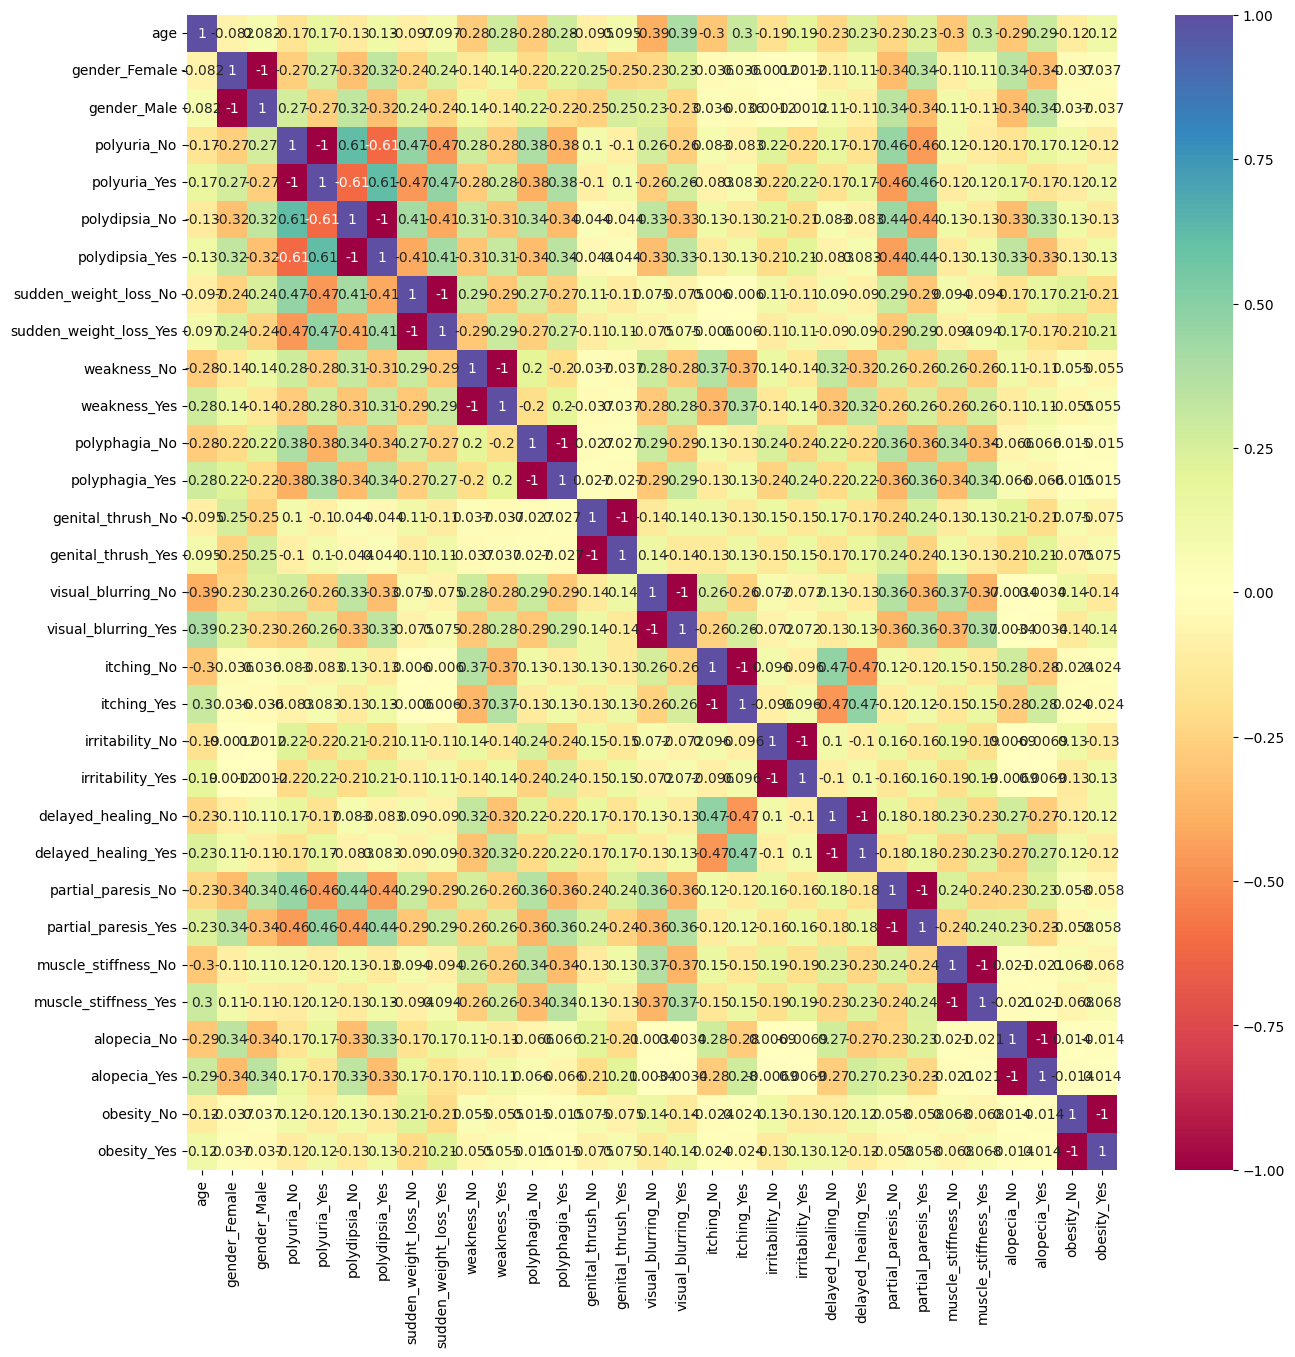

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
sns.heatmap(EDA.corr(numeric_only=True),cmap=sns.color_palette("Spectral", as_cmap=True),annot=True)

First try **_Neural Network Model_**

In [14]:
import keras
from keras import regularizers,layers
from keras.layers import Input,Dense,Dropout

In [15]:
model = keras.Sequential([
    layers.Normalization(input_shape=[31,], axis=None),
    layers.BatchNormalization(),
    layers.Dense(128, activation='leaky_relu',kernel_regularizer=keras.regularizers.L1(0.01)),
    layers.Dropout(0.2),
    layers.BatchNormalization(),
    layers.Dense(64, activation='leaky_relu'),
    layers.BatchNormalization(),
    layers.Dense(1, activation='sigmoid')
]
)

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,StandardScaler,PowerTransformer
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor,make_column_selector,make_column_transformer
import category_encoders as ce

In [17]:
numerical_transformer = Pipeline(steps=[
    ('Scaler',StandardScaler())
])
processer = ColumnTransformer([
    ("cat",numerical_transformer,['age'])
]
)

In [18]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss=keras.losses.binary_crossentropy,
    metrics=['accuracy'])

In [19]:
NN_y = for_EDA['class']
NN_X = for_EDA.drop(columns='class')
NN_X2 = processer.fit_transform(EDA)
X_test_p = processer.fit_transform(X_test)

In [20]:
EDA

,age,gender_Female,gender_Male,polyuria_No,polyuria_Yes,polydipsia_No,polydipsia_Yes,sudden_weight_loss_No,sudden_weight_loss_Yes,weakness_No,...,delayed_healing_No,delayed_healing_Yes,partial_paresis_No,partial_paresis_Yes,muscle_stiffness_No,muscle_stiffness_Yes,alopecia_No,alopecia_Yes,obesity_No,obesity_Yes
0,41,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
1,45,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,60,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
3,66,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
4,67,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,62,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
360,39,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
361,48,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
362,58,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0


In [21]:
y= pd.DataFrame(X_test_p)

In [22]:
x = pd.DataFrame(NN_X2)

In [23]:
EDA['age'] = x

In [24]:
X_test['age'] = y

In [25]:
X_test

,age,gender_Female,gender_Male,polyuria_No,polyuria_Yes,polydipsia_No,polydipsia_Yes,sudden_weight_loss_No,sudden_weight_loss_Yes,weakness_No,...,delayed_healing_No,delayed_healing_Yes,partial_paresis_No,partial_paresis_Yes,muscle_stiffness_No,muscle_stiffness_Yes,alopecia_No,alopecia_Yes,obesity_No,obesity_Yes
0,0.718930,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
1,0.550784,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
2,-1.551035,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,-0.289943,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
4,-0.121798,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,-1.551035,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
152,-0.878453,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
153,-0.962525,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
154,0.130421,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [26]:
X_train, X_valid, y_train, y_valid = train_test_split(EDA, NN_y, test_size=0.2, random_state=77)

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 31)                3         
 on)                                                             
                                                                 
 batch_normalization (Batch  (None, 31)                124       
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 128)               4096      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 batch_normalization_1 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                        

In [28]:

history = model.fit(
    X_train,
    y_train,
    epochs=100,
    # Suppress logging.
    verbose=1,
    # Calculate validation results on 20% of the training data.
    validation_data=(X_valid,y_valid))

Epoch 1/100




UnimplementedError: Graph execution error:

Detected at node binary_crossentropy/Cast defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "C:\Users\peaks\AppData\Roaming\Python\Python311\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "C:\Users\peaks\AppData\Roaming\Python\Python311\site-packages\traitlets\config\application.py", line 1075, in launch_instance

  File "C:\Users\peaks\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelapp.py", line 739, in start

  File "C:\Users\peaks\AppData\Roaming\Python\Python311\site-packages\tornado\platform\asyncio.py", line 205, in start

  File "c:\Users\peaks\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 607, in run_forever

  File "c:\Users\peaks\AppData\Local\Programs\Python\Python311\Lib\asyncio\base_events.py", line 1922, in _run_once

  File "c:\Users\peaks\AppData\Local\Programs\Python\Python311\Lib\asyncio\events.py", line 80, in _run

  File "C:\Users\peaks\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 542, in dispatch_queue

  File "C:\Users\peaks\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 531, in process_one

  File "C:\Users\peaks\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 437, in dispatch_shell

  File "C:\Users\peaks\AppData\Roaming\Python\Python311\site-packages\ipykernel\ipkernel.py", line 359, in execute_request

  File "C:\Users\peaks\AppData\Roaming\Python\Python311\site-packages\ipykernel\kernelbase.py", line 775, in execute_request

  File "C:\Users\peaks\AppData\Roaming\Python\Python311\site-packages\ipykernel\ipkernel.py", line 446, in do_execute

  File "C:\Users\peaks\AppData\Roaming\Python\Python311\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "C:\Users\peaks\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3051, in run_cell

  File "C:\Users\peaks\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3106, in _run_cell

  File "C:\Users\peaks\AppData\Roaming\Python\Python311\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "C:\Users\peaks\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3311, in run_cell_async

  File "C:\Users\peaks\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3493, in run_ast_nodes

  File "C:\Users\peaks\AppData\Roaming\Python\Python311\site-packages\IPython\core\interactiveshell.py", line 3553, in run_code

  File "C:\Users\peaks\AppData\Local\Temp\ipykernel_27388\4049603114.py", line 1, in <module>

  File "c:\Users\peaks\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "c:\Users\peaks\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1807, in fit

  File "c:\Users\peaks\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1401, in train_function

  File "c:\Users\peaks\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1384, in step_function

  File "c:\Users\peaks\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1373, in run_step

  File "c:\Users\peaks\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1151, in train_step

  File "c:\Users\peaks\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py", line 1209, in compute_loss

  File "c:\Users\peaks\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\compile_utils.py", line 277, in __call__

  File "c:\Users\peaks\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\losses.py", line 143, in __call__

  File "c:\Users\peaks\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\losses.py", line 270, in call

  File "c:\Users\peaks\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\losses.py", line 2521, in binary_crossentropy

Cast string to float is not supported
	 [[{{node binary_crossentropy/Cast}}]] [Op:__inference_train_function_2258]

In [ ]:
hist = pd.DataFrame(history.history)    #show final loss and accuracy
hist['epoch'] = history.epoch
hist.tail(1)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
result_nn = y_pred.round()

In [ ]:
R1 = pd.DataFrame(df_test['ID'])
result_nn1 = pd.DataFrame(result_nn)

In [ ]:
mapping2 = {1:'Positive',0:'Negative'}
result = result_nn1.replace(mapping)

In [ ]:
R1['class'] = result

In [ ]:
R1

In [ ]:
R1.to_csv('submission2.csv', index=False)
R1.to_csv(r'C:\Users\peaks\Desktop\Submission\submission2.csv', index=False)

In [ ]:
import matplotlib.pyplot as plt #import graphing method

In [ ]:
def plot_graphs(history, metric): # plit loss and accuracy of train and valid set
  plt.plot(history.history[metric])
  plt.plot(history.history['val_'+metric], '')
  plt.xlabel("Epochs")
  plt.ylabel(metric)
  plt.legend([metric, 'val_'+metric])
  
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plot_graphs(history, 'accuracy')
plt.ylim(None, 1)
plt.subplot(1, 2, 2)
plot_graphs(history, 'loss')
plt.ylim(0, None)

2nd try **_XGBoost_**